In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset= pd.read_csv('./Dataset/Position Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
dataset.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [13]:
dataset.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [17]:
dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

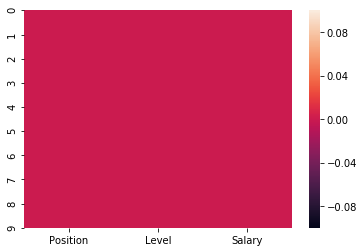

In [18]:
sns.heatmap(dataset.isnull())

In [15]:
dataset.shape

(10, 3)

In [4]:
dataset.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


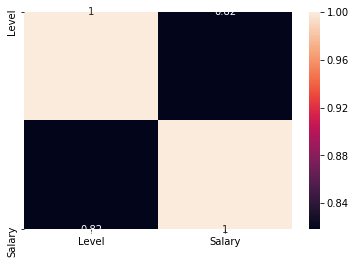

In [7]:
sns.heatmap(dataset.corr(), annot =True)

In [5]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


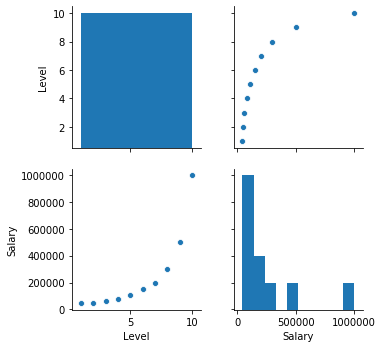

In [8]:
sns.pairplot(dataset)

In [6]:
# Since Position and level mean the same hence we'll not consider position as a attribute
x= dataset.iloc[:, 1:2].values
y= dataset.iloc[:, -1].values

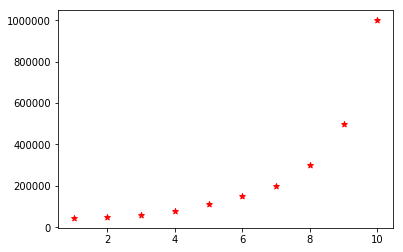

In [7]:
plt.scatter(x, y, color ='r', marker = '*')
plt.show()

In [8]:
# Since the dataset is small hence we won't split it into train and test so as to get more statistically correct predictions

In [9]:
# fitting simple LR model to the dataset:
from sklearn.linear_model import LinearRegression
lr1= LinearRegression()
lr1.fit(x, y)
print(lr1.predict([[6.5]])) # Salary prediction
print(lr1.score(x, y))  # Training score

[330378.78787879]
0.6690412331929895


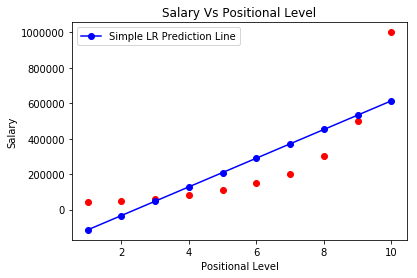

In [10]:
# Visualising the results of Simple LR
plt.scatter(x, y, color='red')
plt.plot(x, lr1.predict(x), marker='o', color='blue', label='Simple LR Prediction Line')
plt.title('Salary Vs Positional Level')
plt.xlabel('Positional Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

**Here linear regression is not able to well fitted with all data points.**

In [11]:
# fitting polynomial LR model with degree 2 to the dataset
from sklearn.preprocessing import PolynomialFeatures
pr2= PolynomialFeatures(degree=2) # degree=2 bydefault
x_poly2= pr2.fit_transform(x)
x_poly2
# by fit & transform x we got extra terms in x which are powers of x upto degree specified

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [12]:
# Now fitting x_poly to the LR model
lr2= LinearRegression()  
lr2.fit(x_poly2, y)
print(lr2.predict(pr2.transform([[6.5]])))
print(lr2.score(x_poly2, y))  # Training score

[189498.10606061]
0.9162082221443942


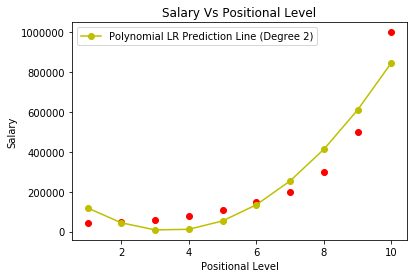

In [20]:
# Visualising the results of polynomial LR with degree=2
plt.scatter(x, y, color='red')
plt.plot(x, lr2.predict(pr2.transform(x)),marker='o', color='y', label='Polynomial LR Prediction Line (Degree 2)')
plt.title('Salary Vs Positional Level')
plt.xlabel('Positional Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [14]:
# fitting polynomial LR model with degree 3 to the dataset
pr3 = PolynomialFeatures(degree = 3)
x_poly3 = pr3.fit_transform(x)

lr3 = LinearRegression()
lr3.fit(x_poly3, y)
print(lr3.predict(pr3.transform([[6.5]])))
print(lr3.score(x_poly3, y))  # Training score

[133259.46969697]
0.9812097727913367


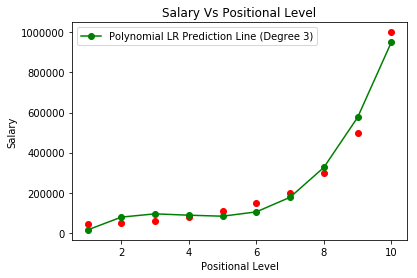

In [21]:
# Visualising the results of polynomial LR with degree=3
plt.scatter(x, y, color='red')
plt.plot(x, lr3.predict(pr3.transform(x)), color='g',marker='o', label='Polynomial LR Prediction Line (Degree 3)')
plt.title('Salary Vs Positional Level')
plt.xlabel('Positional Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [16]:
# fitting polynomial LR model with degree 4 to the dataset
pr4 = PolynomialFeatures(degree = 4)
x_poly4 = pr4.fit_transform(x)

lr4 = LinearRegression()
lr4.fit(x_poly4, y)
print(lr4.predict(pr4.transform([[6.5]])))
print(lr4.score(x_poly4, y))  # Training score

[158862.45265153]
0.9973922891706614


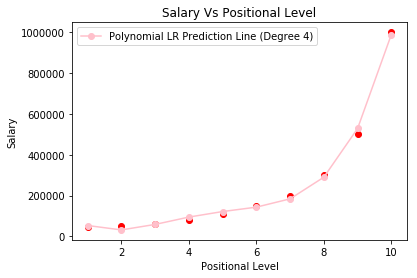

In [22]:
# Visualising the results of polynomial LR with degree=4
plt.scatter(x, y, color='red')
plt.plot(x, lr4.predict(pr4.transform(x)), color='pink', marker='o', label='Polynomial LR Prediction Line (Degree 4)')
plt.title('Salary Vs Positional Level')
plt.xlabel('Positional Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [18]:
# fitting polynomial LR model with degree 5 to the dataset
pr5 = PolynomialFeatures(degree = 5)
x_poly5 = pr5.fit_transform(x)

lr5 = LinearRegression()
lr5.fit(x_poly5, y)
print(lr5.predict(pr5.transform([[6.5]])))
print(lr5.score(x_poly5, y))  # Training score

[174878.07765118]
0.9997969027099753


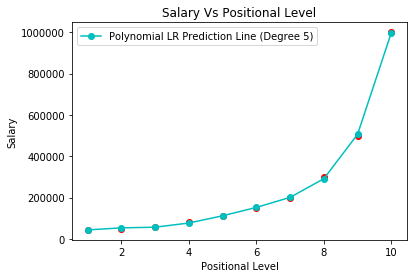

In [23]:
# Visualising the results of polynomial LR with degree=5
plt.scatter(x, y, color='red')
plt.plot(x, lr5.predict(pr5.transform(x)), color='c', marker='o', label='Polynomial LR Prediction Line (Degree 5)')
plt.title('Salary Vs Positional Level')
plt.xlabel('Positional Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

Hence as degree of polynomial equation increases accuracy of model increases. But problem of Overfitting in the model has started  after degree=4.

### Advantages of using Polynomial Regression:
- Polynomial provides the best approximation of the relationship between the dependent and independent variable.
- A Broad range of function can be fit under it.
- Polynomial basically fits a wide range of curvature.

### Disadvantages of using Polynomial Regression:
- The presence of one or two outliers in the data can seriously affect the results of the nonlinear analysis.
- These are too sensitive to the outliers.
- In addition, there are unfortunately fewer model validation tools for the detection of outliers in nonlinear regression than there are for linear regression.